In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.style.use('seaborn')
import statsmodels.api as sm
# % get_backend()
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

from feat_to_model_eval import feat_to_model_kfold_eval

In [15]:
%reload_ext autoreload
%autoreload 2

In [16]:
df = pd.read_csv('kc_house_data.csv')

In [17]:
df, df_holdout = train_test_split(df, test_size=0.15)             
       # KEEPING A 15% HOLDOUT OF PRETEND UNSEEN DATA FOR VALIDATION
        # THE ANSWER IS CROSS VALIDATION

### CRISP DM
### STEP 1: Data Understanding

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18357 entries, 13812 to 9603
Data columns (total 21 columns):
id               18357 non-null int64
date             18357 non-null object
price            18357 non-null float64
bedrooms         18357 non-null int64
bathrooms        18357 non-null float64
sqft_living      18357 non-null int64
sqft_lot         18357 non-null int64
floors           18357 non-null float64
waterfront       16329 non-null float64
view             18301 non-null float64
condition        18357 non-null int64
grade            18357 non-null int64
sqft_above       18357 non-null int64
sqft_basement    18357 non-null object
yr_built         18357 non-null int64
yr_renovated     15080 non-null float64
zipcode          18357 non-null int64
lat              18357 non-null float64
long             18357 non-null float64
sqft_living15    18357 non-null int64
sqft_lot15       18357 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.1+ MB


In [32]:
df.describe().T    # TILTED FOR SPACE

,count,mean,std,min,25%,50%,75%,max
id,18357.0,4.571975e+09,2.872245e+09,1.000102e+06,2.122059e+09,3.904940e+09,7.301300e+09,9.900000e+09
price,18357.0,5.412770e+05,3.725789e+05,7.800000e+04,3.210270e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,18357.0,3.374843e+00,9.330878e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,18357.0,2.114943e+00,7.697019e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,18357.0,2.082403e+03,9.237679e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,18357.0,1.518149e+04,4.065319e+04,5.200000e+02,5.070000e+03,7.625000e+03,1.070300e+04,1.164794e+06
floors,18357.0,1.493790e+00,5.393278e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,16329.0,7.961296e-03,8.887293e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,18301.0,2.356155e-01,7.699275e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,18357.0,3.415318e+00,6.543522e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [33]:
predictors = []

In [34]:
# Lets look through each column to examine the data

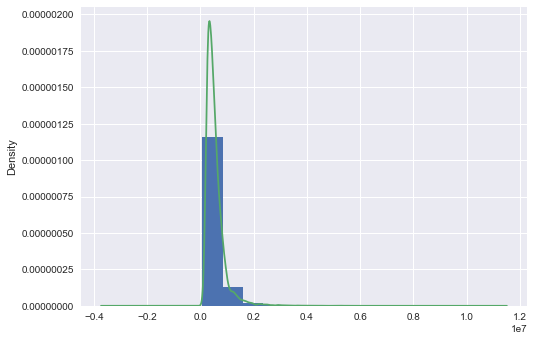

In [37]:
df.price.hist(density=True)
df.price.plot.kde()

In [40]:
print(f'price median: {df.price.median()}, price mean: {df.price.mean()}')

price median: 450000.0, price mean: 541277.0244048592


In [42]:
# Thats skewed in the positive direction. Lets explore the log!

df['log_price'] = np.log(df.price)

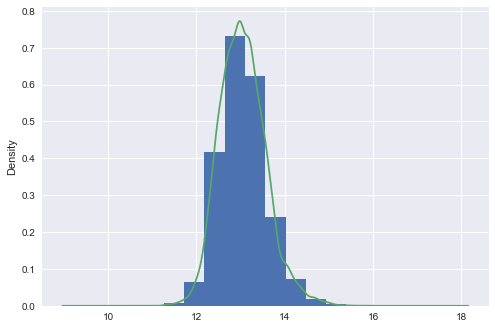

In [43]:
df.log_price.hist(density=True)
df.log_price.plot.kde()

In [44]:
print(f'log price median: {df.log_price.median()}, log price mean: {df.log_price.mean()}')

log price median: 13.017002861746503, log price mean: 13.04873197032407


In [45]:
# MUCH MORE NORMALLY DISTRIBUTED! YAYY!!
#.      Lets move on to bedrooms

In [50]:
df.bedrooms.unique()

array([ 5,  4,  3,  2,  6,  1,  8,  9,  7, 11, 10, 33])

In [51]:
# WHOAA 33 BEDROOMS!?!?!? How many rows have this value?
df.bedrooms.value_counts()

3     8359
4     5841
2     2340
5     1354
6      238
1      167
7       36
8       12
9        6
10       2
11       1
33       1
Name: bedrooms, dtype: int64

In [53]:
df.loc[df.bedrooms == 33,]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700,13.369223


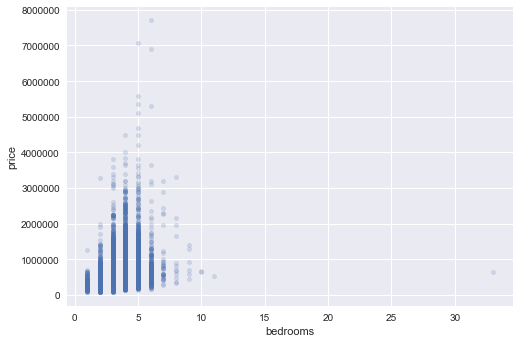

'Correlation between price and number of bedrooms is 0.3067'

In [65]:
# Less than 1700 sqft ! Likely typo meant to be 3

# Is this column useful otherwise???
df.plot.scatter('bedrooms', 'price', alpha=0.2)
plt.show()
f'Correlation between price and number of bedrooms is {round(df.price.corr(df.bedrooms), 4)}'

In [70]:
# This is potentially usefull. Lets drop that row
df = df.drop(df[df.bedrooms == 33].index)

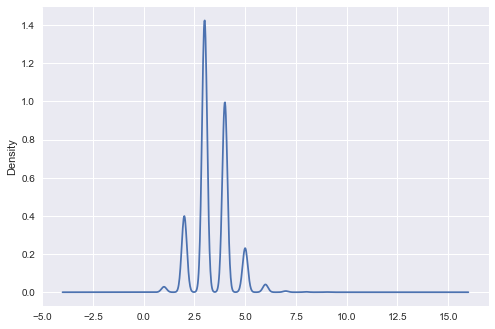

In [71]:
df.bedrooms.plot.kde()

In [72]:
print(f'bedrooms median: {df.bedrooms.median()}, bedrooms mean: {df.bedrooms.mean()}')

bedrooms median: 3.0, bedrooms mean: 3.373229461756374


In [73]:
df['log_bedrooms'] = np.log(df.bedrooms)

log bedrooms median: 1.0986122886681098, log bedrooms mean: 1.1780028356226457


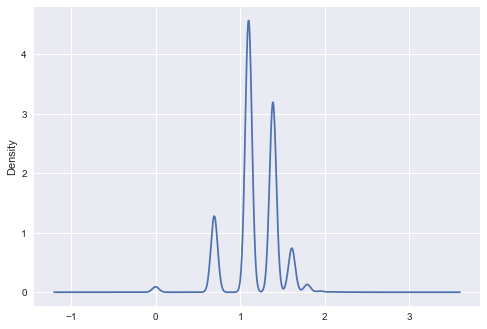

In [76]:
print(f'log bedrooms median: {df.log_bedrooms.median()}, log bedrooms mean: {df.log_bedrooms.mean()}')
df.log_bedrooms.plot.kde()

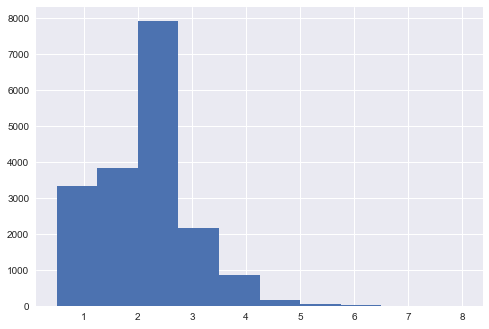

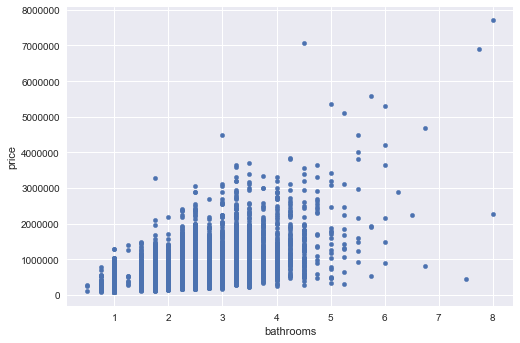

In [79]:
# Interesting we could try both in the next phase

# What about bathrooms?
df.bathrooms.hist()
df.plot.scatter('bathrooms', 'price')
print(f'The correlation is ')

In [ ]:
# Looks nice! What about the log??

In [64]:
sorted(df.bedrooms.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33]

In [1]:
"""Basic model"""
feat_to_model_kfold_eval('price', ['sqft_living', 'grade'], df=temp, kvals=[5, 10], show_summary=True)

NameError: name 'feat_to_model_kfold_eval' is not defined